In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import hdbscan
from umap import UMAP
from scripts.data_cleaner import filter_top_cpv_categories
from scripts.preprocess_pipeline import create_pipeline_cat

from sklearn.decomposition import PCA

from scripts.data_cleaner import filter_top_cpv_categories
from sklearn.model_selection import train_test_split
from scripts.preprocess_pipeline import create_pipeline_cat


/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv('../data/data_clean.csv', encoding='utf-8')

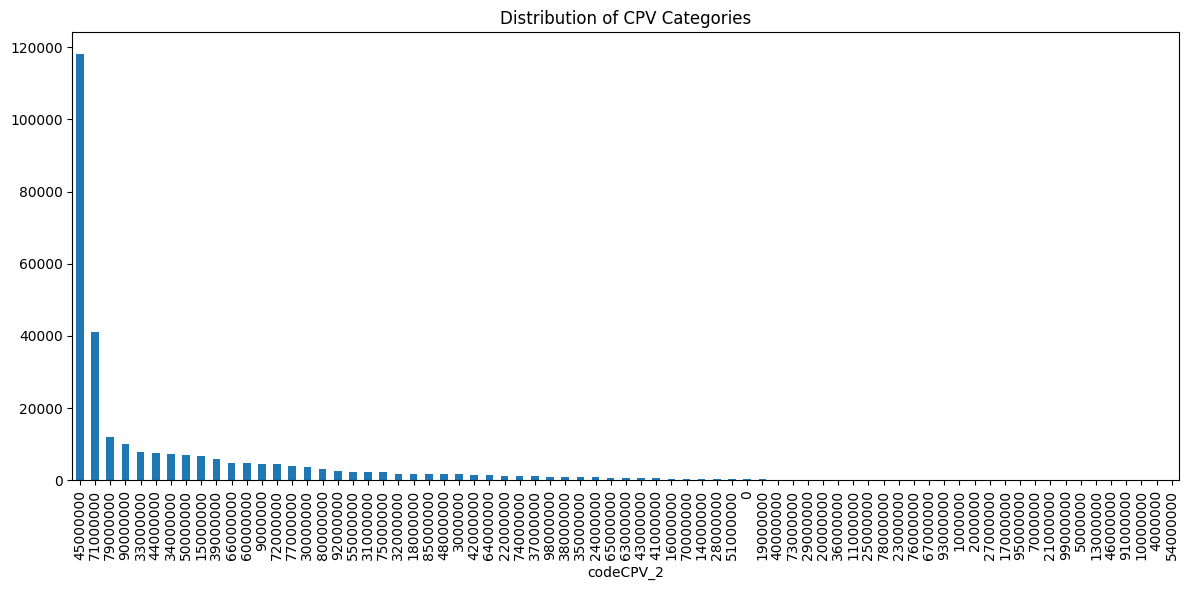

In [3]:

plt.figure(figsize=(12, 6))
df['codeCPV_2'].value_counts().plot(kind='bar')
plt.title('Distribution of CPV Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

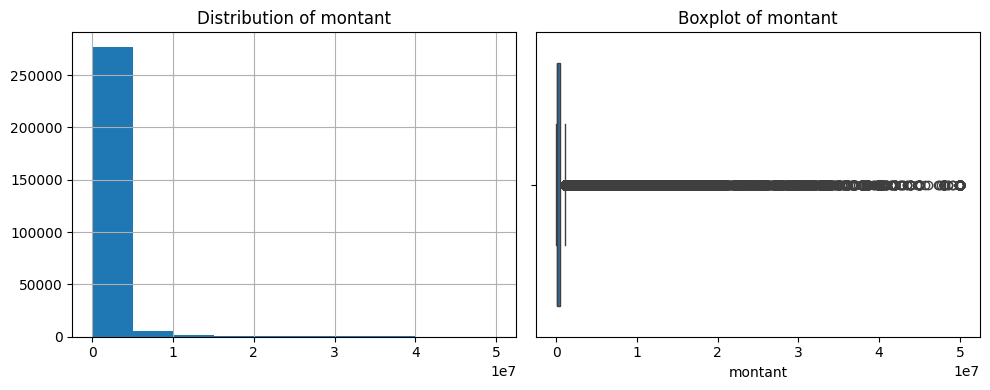

In [ ]:
for col in ['montant', 'dureeEnMois']:  # Add your key numerical columns
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        df[col].hist()
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [5]:

df_cpv = filter_top_cpv_categories(df, top_n=40, cpv_column='codeCPV_2')

Filtered from 73 to 40 CPV categories, keeping 283975 rows out of 286850


In [6]:
df_cpv

uid              id  nature     acheteur_id  \
0       2154005160001320242024-LOT04  20242024-LOT04  Marché  21540051600013   
1           243500667002882021M226MO      2021M226MO  Marché  24350066700288   
2       249710047000472024SS_PRD_TRV  2024SS_PRD_TRV  Marché  24971004700047   
3           6254801990001124-0806-L2      24-0806-L2  Marché  62548019900011   
4         20002563300013202424011BCR    202424011BCR  Marché  20002563300013   
...                              ...             ...     ...             ...   
286845      243000643000452024240072      2024240072  Marché  24300064300045   
286846     2133016250001720230231110     20230231110  Marché  21330162500017   
286847   25440109400068202323_006_02   202323_006_02  Marché  25440109400068   
286848      219711132000152022I772-4      2022I772-4  Marché  21971113200015   
286849  200054807000172025Z240001S10  2025Z240001S10  Marché  20005480700017   

                                             acheteur_nom  acheteur_siren  \
0                                      COMMUNE DE BATILLY     215400516.0   
1                                   CC VAL D'ILLE-AUBIGNE     243500667.0   
2                 COMMUNAUTE DE COMMUNES DE MARIE GALANTE     249710047.0   
3       LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...     625480199.0   
4                           SI DE RESTAURATION COLLECTIVE     200025633.0   
...                                                   ...             ...   
286845                   COMMUNAUTE AGGLO NIMES METROPOLE     243000643.0   
286846                                  COMMUNE D'EYSINES     213301625.0   
286847                        SYNDICAT MIXTE ATLANTIC'EAU     254401094.0   
286848                                  COMMUNE DU GOSIER     219711132.0   
286849                 METROPOLE D'AIX-MARSEILLE-PROVENCE     200054807.0   

          titulaire_id titulaire_typeIdentifiant  \
0       78885470100018                     SIRET   
1       38373211200032                     SIRET   
2       43387249600016                     SIRET   
3       55204695502544                     SIRET   
4       47698032100238                     SIRET   
...                ...                       ...   
286845  79386502300055                     SIRET   
286846  44010434700032                     SIRET   
286847  42856174000138                     SIRET   
286848  41347003000029                     SIRET   
286849  43323036400047                     SIRET   

                                            titulaire_nom  titulaire_siren  \
0                                                ACOMETAL      788854701.0   
1                                                 UNIVERS      383732112.0   
2                                           COTRAM B.T.P.      433872496.0   
3                                  ENGIE ENERGIE SERVICES      552046955.0   
4                                       POMONA EPISAVEURS      476980321.0   
...                                                   ...              ...   
286845                      SERVICES MAINTENANCE ENERGIES      793865023.0   
286846                                   L.T.B. AQUITAINE      440104347.0   
286847                                            CISE TP      428561740.0   
286848  SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT      413470030.0   
286849                                          SETEC ITS      433230364.0   

        ... lieuExecution_typeCode  idAccordCadre  \
0       ...            Code postal            NaN   
1       ...            Code postal            NaN   
2       ...            Code postal            NaN   
3       ...       Code département            NaN   
4       ...            Code postal            NaN   
...     ...                    ...            ...   
286845  ...            Code postal            NaN   
286846  ...            Code postal            NaN   
286847  ...            Code postal            NaN   
286848  ...            Code postal            NaN   
28

In [8]:
X_train, X_test = train_test_split(df_cpv, test_size=0.2, random_state=0, stratify=df_cpv['codeCPV_2'])

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227180 entries, 61651 to 111724
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        227180 non-null  object 
 1   id                         227180 non-null  object 
 2   nature                     227180 non-null  object 
 3   acheteur_id                227180 non-null  int64  
 4   acheteur_nom               227034 non-null  object 
 5   acheteur_siren             227050 non-null  float64
 6   titulaire_id               227180 non-null  object 
 7   titulaire_typeIdentifiant  227180 non-null  object 
 8   titulaire_nom              221481 non-null  object 
 9   titulaire_siren            226328 non-null  float64
 10  objet                      227180 non-null  object 
 11  montant                    227180 non-null  float64
 12  codeCPV                    227180 non-null  object 
 13  procedure                  227

In [42]:
X_train['dureeMois'].min()

1.0

In [10]:
cat_list = ['marche_sim']
cat = cat_list[0]
pipeline = create_pipeline_cat(cat)

In [11]:
pipeline

Pipeline(steps=[('init',
                 Pipeline(steps=[('id_accord_encoder', IdAccordCadreEncoder()),
                                 ('taux_avance_categorizer',
                                  TauxAvanceCategorizer()),
                                 ('outliers_feature_rows_selector',
                                  InitTransformer(binary_columns=['sousTraitanceDeclaree',
                                                                  'origineFrance',
                                                                  'marcheInnovant',
                                                                  'idAccordCadre'],
                                                  categorical_columns=['procedure',
                                                                       'nature',
                                                                       'formePrix',
                                                                       'ccag',
                                                                       'typeGroupem...
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('string_converter',
                                                                                    StringConverter()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['procedure',
                                                                    'nature',
                                                                    'formePrix',
                                                                    'ccag',
                                                                    'typeGroupementOperateurs',
                                                                    'tauxAvance_cat',
                                                                    'codeCPV_2'])]))])),
                ('to_dataframe',
                 FunctionTransformer(func=<function create_pipeline.<locals>.<lambda> at 0x34bdaf7f0>))])

In [12]:
X_train_preproc = pipeline.fit_transform(X_train)
X_test_preproc = pipeline.transform(X_test)

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [13]:
X_train_preproc.shape


(227180, 74)

In [14]:
X_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227180 entries, 0 to 227179
Data columns (total 74 columns):
 #   Column                                                                                Non-Null Count   Dtype  
---  ------                                                                                --------------   -----  
 0   offres_recues_pipeline__offresRecues                                                  227180 non-null  float64
 1   other_num_pipeline__montant                                                           227180 non-null  float64
 2   other_num_pipeline__dureeMois                                                         227180 non-null  float64
 3   binary_pipeline__sousTraitanceDeclaree                                                227180 non-null  float64
 4   binary_pipeline__origineFrance                                                        227180 non-null  float64
 5   binary_pipeline__marcheInnovant                                         

In [43]:
X_train_preproc['other_num_pipeline__dureeMois'].min()

-2.5058704957833187

In [16]:
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_preproc)
X_test_pca = pca.transform(X_test_preproc)

print(f"Original dimensions: {X_train_preproc.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print(f"Explained variance: {sum(pca.explained_variance_ratio_):.2f}")

Original dimensions: 74
Reduced dimensions: 16
Explained variance: 0.91


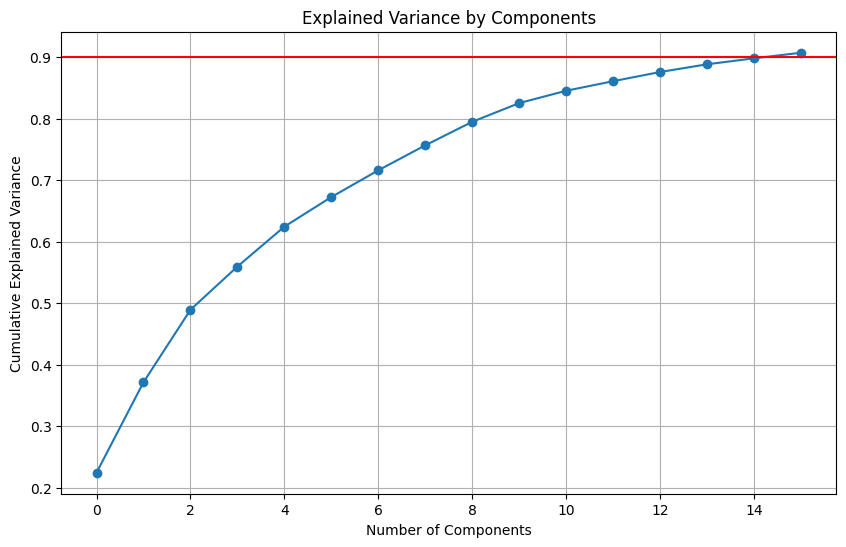

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


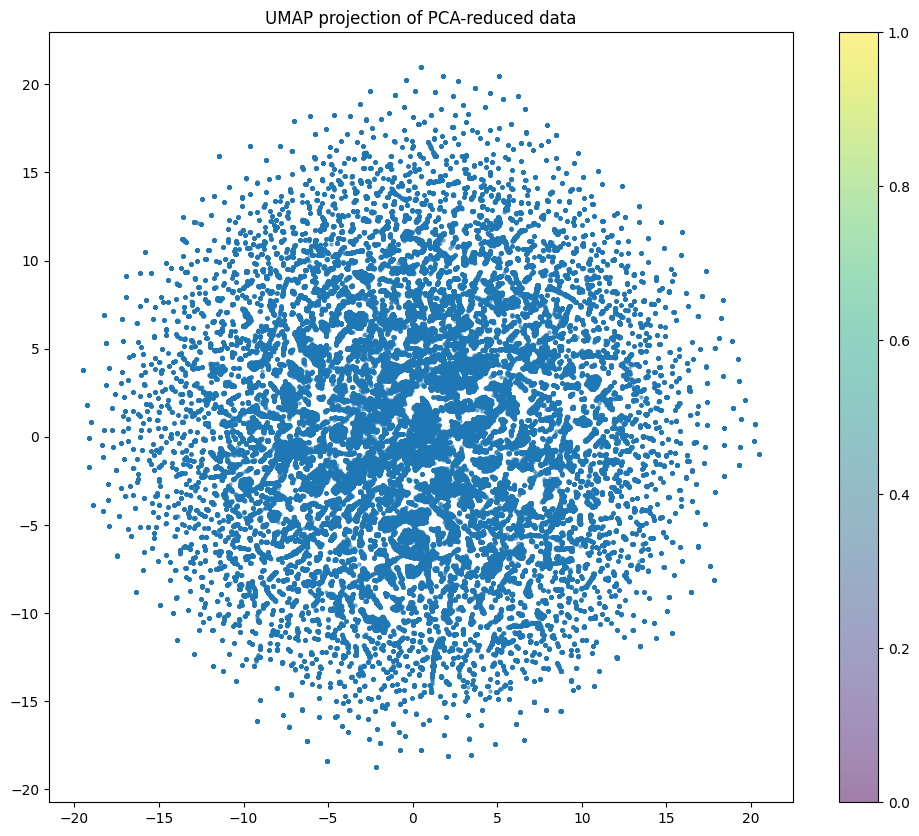

In [ ]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, random_state=42)
X_train_umap = reducer.fit_transform(X_train_pca)

# Plot UMAP projection
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], s=5, alpha=0.5)
plt.title('UMAP projection of PCA-reduced data')
plt.colorbar()
plt.show()

# HDBSCAN : clustering

In [24]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,
                           min_samples=5,
                           cluster_selection_epsilon=0.5,
                           metric='euclidean')

cluster_labels = clusterer.fit_predict(X_train_pca)


/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:

# Check cluster distribution
unique_clusters = np.unique(cluster_labels)
print(f"Number of clusters found: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print("Cluster distribution:")
for cluster in unique_clusters:
    if cluster != -1:
        print(f"Cluster {cluster}: {np.sum(cluster_labels == cluster)} samples")
print(f"Noise points: {np.sum(cluster_labels == -1)} samples")

Number of clusters found: 650
Cluster distribution:
Cluster 0: 3889 samples
Cluster 1: 71 samples
Cluster 2: 80 samples
Cluster 3: 133 samples
Cluster 4: 79 samples
Cluster 5: 117 samples
Cluster 6: 200 samples
Cluster 7: 139 samples
Cluster 8: 63 samples
Cluster 9: 93 samples
Cluster 10: 63 samples
Cluster 11: 68 samples
Cluster 12: 86 samples
Cluster 13: 119 samples
Cluster 14: 71 samples
Cluster 15: 53 samples
Cluster 16: 113 samples
Cluster 17: 82 samples
Cluster 18: 94 samples
Cluster 19: 97 samples
Cluster 20: 149 samples
Cluster 21: 80 samples
Cluster 22: 64 samples
Cluster 23: 371 samples
Cluster 24: 81 samples
Cluster 25: 143 samples
Cluster 26: 52 samples
Cluster 27: 105 samples
Cluster 28: 150 samples
Cluster 29: 56 samples
Cluster 30: 93 samples
Cluster 31: 194 samples
Cluster 32: 94 samples
Cluster 33: 83 samples
Cluster 34: 320 samples
Cluster 35: 125 samples
Cluster 36: 107 samples
Cluster 37: 59 samples
Cluster 38: 132 samples
Cluster 39: 116 samples
Cluster 40: 68 samp

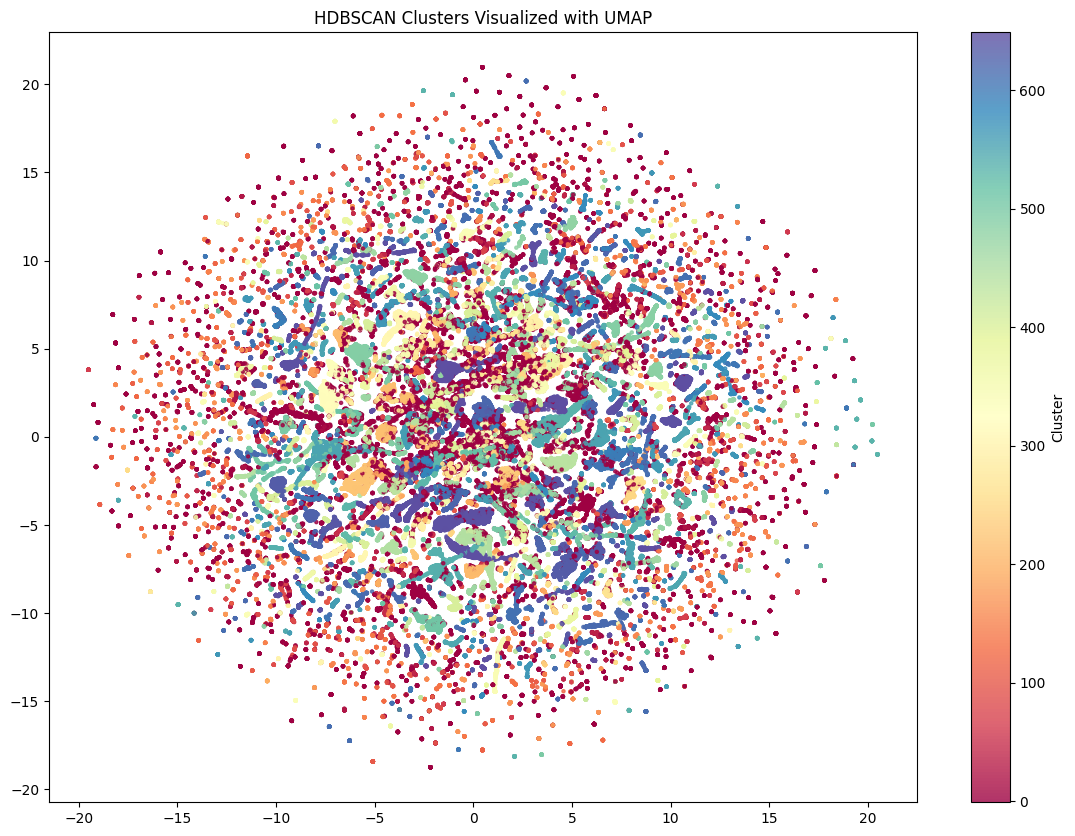

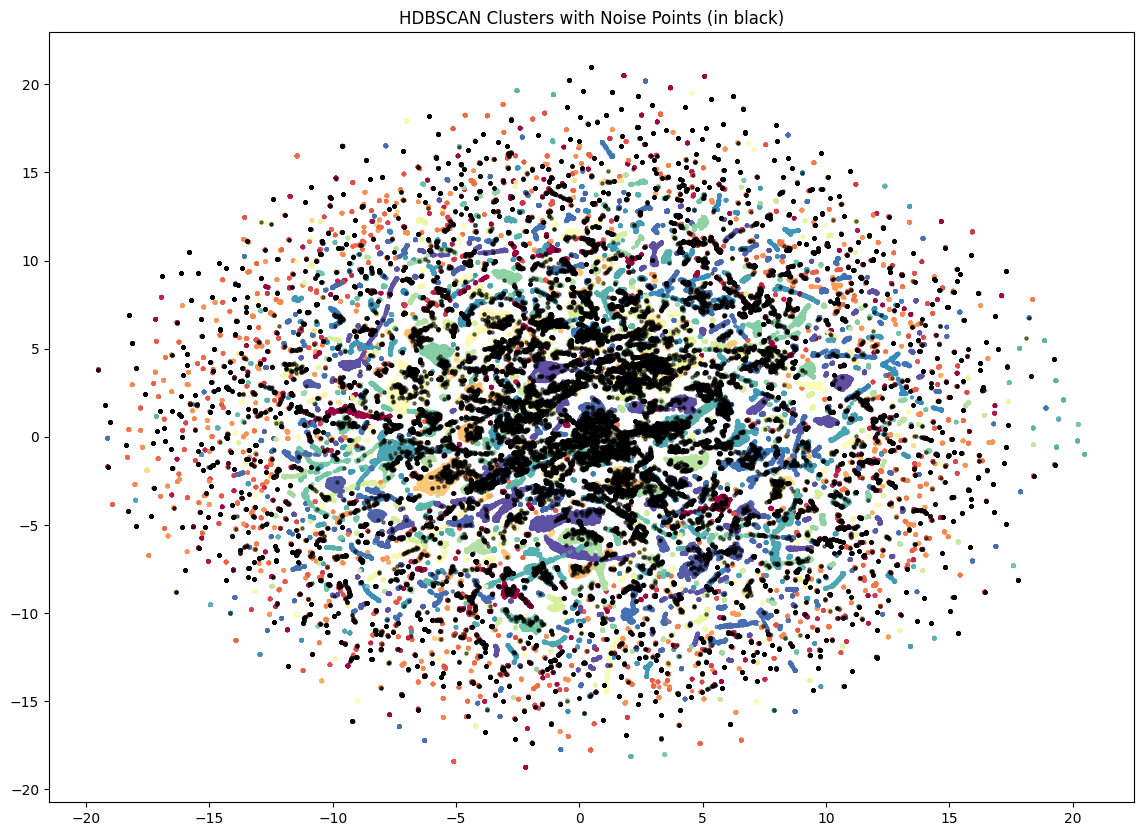

In [ ]:
# Plot clusters on UMAP projection
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                     c=cluster_labels, cmap='Spectral', s=5, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('HDBSCAN Clusters Visualized with UMAP')
plt.show()

# Examine noise points separately
plt.figure(figsize=(14, 10))
noise_mask = (cluster_labels == -1)
plt.scatter(X_train_umap[~noise_mask, 0], X_train_umap[~noise_mask, 1],
           c=cluster_labels[~noise_mask], cmap='Spectral', s=5, alpha=0.8)
plt.scatter(X_train_umap[noise_mask, 0], X_train_umap[noise_mask, 1],
           color='black', s=5, alpha=0.5)
plt.title('HDBSCAN Clusters with Noise Points (in black)')
plt.show()

- Complex high-dimensional structure: The clusters are likely separated in dimensions not visible in this 2D projection.

- Subtle differences between clusters: The boundaries between market types are not sharp but gradual.

- Potentially many specialized market types: The large number of clusters suggests many specialized market categories with subtle differences.


Cluster 0 - Top 5 CPV categories:
codeCPV_2
45000000    1824
71000000     488
80000000     293
79000000     201
60000000     130
Name: count, dtype: int64

Cluster 1 - Top 5 CPV categories:
codeCPV_2
45000000    44
9000000     10
34000000    10
44000000     7
Name: count, dtype: int64

Cluster 2 - Top 5 CPV categories:
codeCPV_2
45000000    49
9000000     15
44000000     7
77000000     5
34000000     4
Name: count, dtype: int64

Cluster 3 - Top 5 CPV categories:
codeCPV_2
60000000    132
31000000      1
Name: count, dtype: int64

Cluster 4 - Top 5 CPV categories:
codeCPV_2
45000000    79
Name: count, dtype: int64

Cluster 5 - Top 5 CPV categories:
codeCPV_2
33000000    116
15000000      1
Name: count, dtype: int64

Cluster 6 - Top 5 CPV categories:
codeCPV_2
79000000    62
50000000    28
77000000    28
71000000    23
60000000    13
Name: count, dtype: int64

Cluster 7 - Top 5 CPV categories:
codeCPV_2
45000000    95
71000000    18
98000000     7
22000000     5
38000000     2
Name: cou

<Figure size 1500x1000 with 0 Axes>

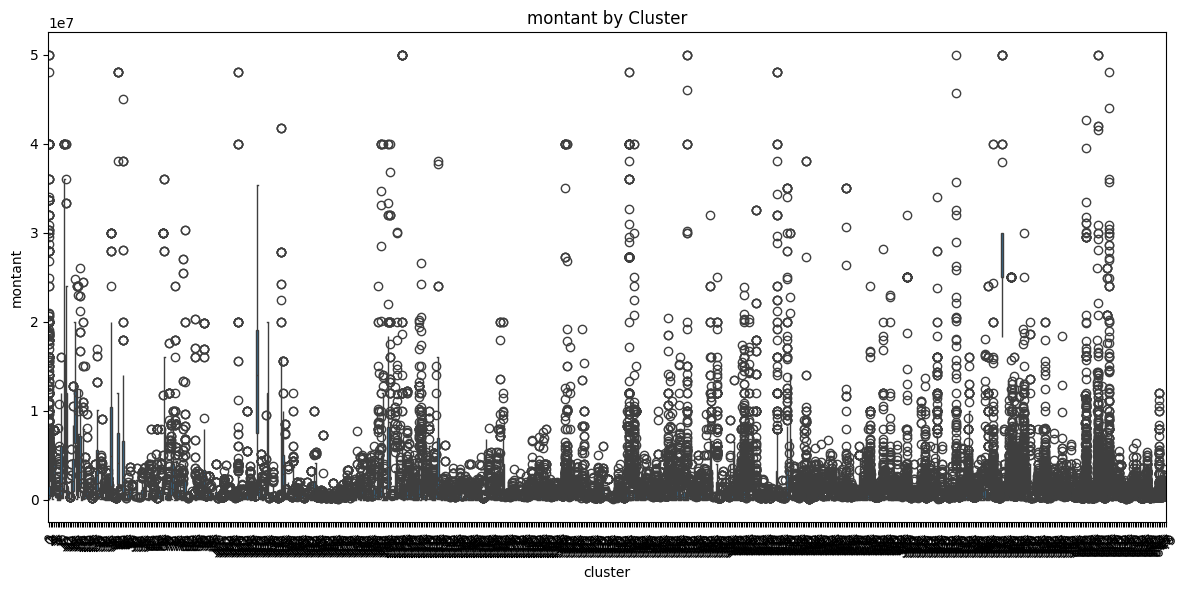

In [27]:
# Add cluster labels back to original data
X_train_with_clusters = X_train.copy()
X_train_with_clusters['cluster'] = cluster_labels

# Analyze clusters by CPV codes
plt.figure(figsize=(15, 10))
for cluster in sorted(unique_clusters):
    if cluster == -1:
        continue
    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster]
    print(f"\nCluster {cluster} - Top 5 CPV categories:")
    print(cluster_data['codeCPV_2'].value_counts().head(5))

# Analyze numerical features by cluster
for feature in ['montant', 'dureeEnMois']:
    if feature in X_train_with_clusters.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='cluster', y=feature, data=X_train_with_clusters[X_train_with_clusters['cluster'] != -1])
        plt.title(f'{feature} by Cluster')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
# Calculate silhouette score (excluding noise points)
valid_points = cluster_labels != -1
if np.sum(valid_points) > 1 and len(np.unique(cluster_labels[valid_points])) > 1:
    silhouette_avg = silhouette_score(
        X_train_pca[valid_points],
        cluster_labels[valid_points]
    )
    print(f"Silhouette Score (excluding noise): {silhouette_avg:.3f}")

Silhouette Score (excluding noise): 0.055


In [ ]:
# Create a summary table for each cluster
cluster_summary = {}

for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue

    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_id]

    # Gather key statistics
    summary = {
        'size': len(cluster_data),
        'pct_of_data': len(cluster_data) / len(X_train_with_clusters) * 100,
        'top_cpv': cluster_data['codeCPV_2'].value_counts().index[0],
        'top_cpv_pct': cluster_data['codeCPV_2'].value_counts().iloc[0] / len(cluster_data) * 100
    }

    # Add any numerical features
    for col in ['montant', 'dureeEnMois']:
        if col in cluster_data.columns:
            summary[f'avg_{col}'] = cluster_data[col].mean()
            summary[f'med_{col}'] = cluster_data[col].median()

    cluster_summary[cluster_id] = summary

# Convert to DataFrame and display
summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')
print("Cluster Summary:")
summary_df

Cluster Summary:


size  pct_of_data   top_cpv  top_cpv_pct   avg_montant  med_montant
0    3889     1.711858  45000000    46.901517  2.089340e+06   500000.000
1      71     0.031253  45000000    61.971831  2.976893e+06  3334000.000
2      80     0.035214  45000000    61.250000  2.167627e+06  1667000.000
3     133     0.058544  60000000    99.248120  3.088827e+06  2872727.280
4      79     0.034774  45000000   100.000000  5.526447e+05   557040.720
..    ...          ...       ...          ...           ...          ...
645  3638     1.601373  45000000   100.000000  2.403513e+05    96079.745
646  1785     0.785721  45000000   100.000000  1.496949e+05    85798.160
647  6103     2.686416  45000000   100.000000  1.579401e+05    94815.000
648   597     0.262787  45000000   100.000000  2.200928e+05   129700.000
649  1725     0.759310  45000000   100.000000  2.003006e+05   125909.000

[650 rows x 6 columns]

# Optimize UMAP parameters to improve clustering

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 

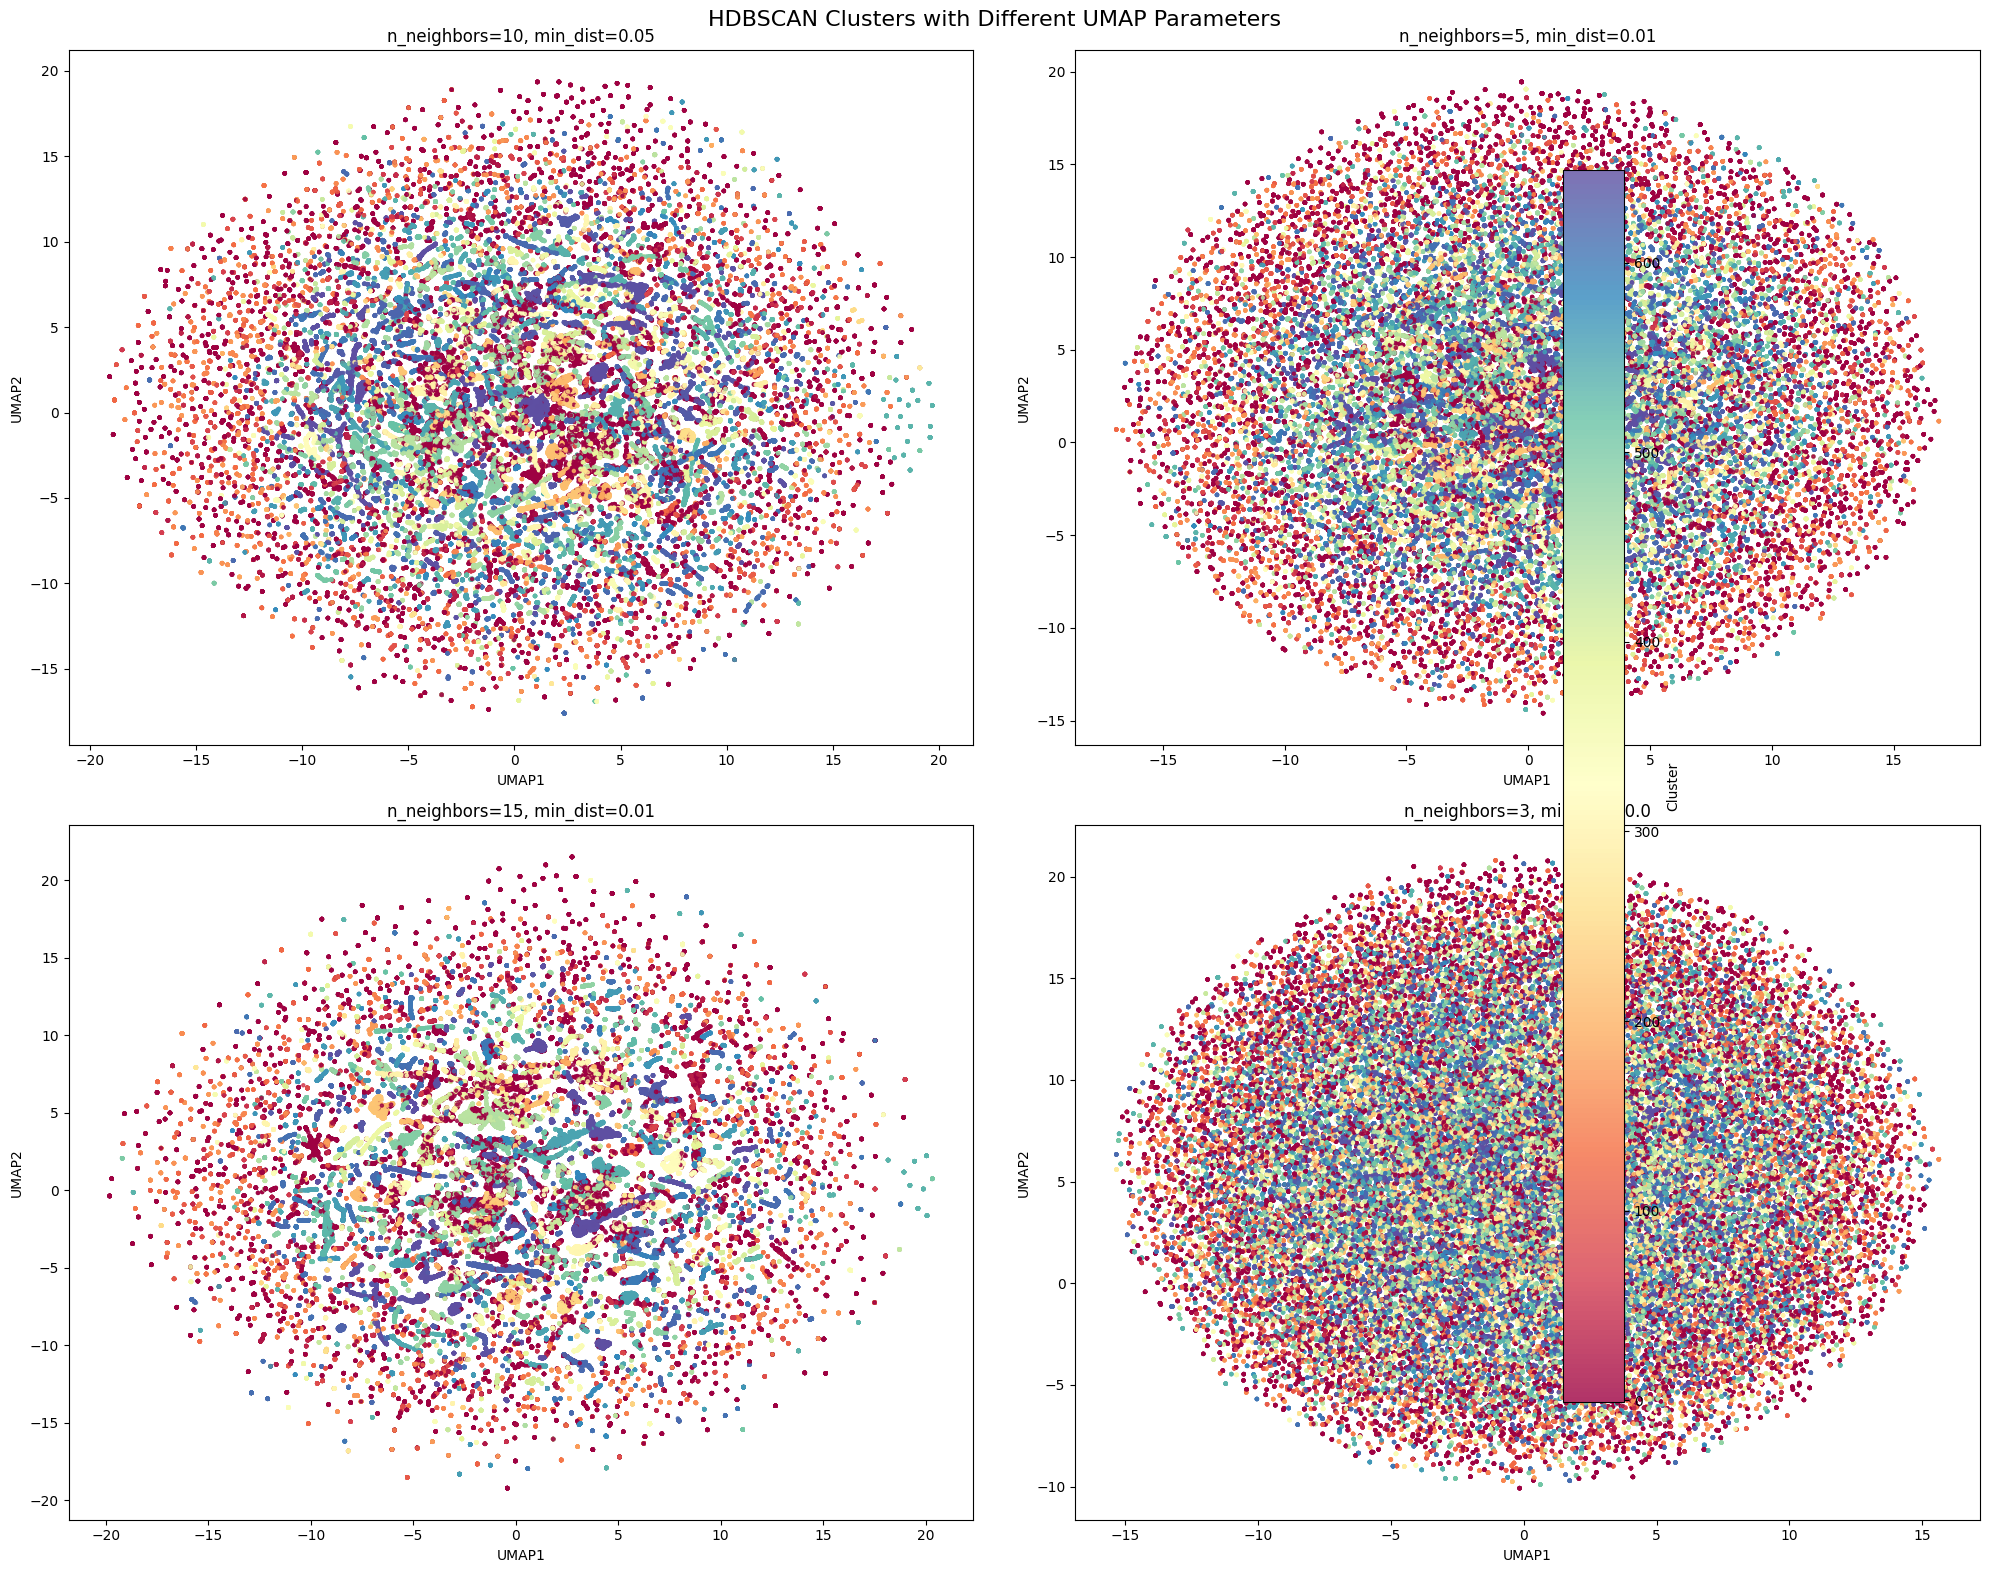

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

umap_params = [
    {'n_neighbors': 10, 'min_dist': 0.05},
    {'n_neighbors': 5, 'min_dist': 0.01},
    {'n_neighbors': 15, 'min_dist': 0.01},
    {'n_neighbors': 3, 'min_dist': 0.0}
]

for i, params in enumerate(umap_params):
    # Create UMAP embedding with new parameters
    reducer = UMAP(n_components=2, random_state=42, **params)
    embedding = reducer.fit_transform(X_train_pca)

    # Plot the clusters on this embedding
    scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1],
                            c=cluster_labels, cmap='Spectral', s=5, alpha=0.8)

    # Add title and labels
    axes[i].set_title(f"n_neighbors={params['n_neighbors']}, min_dist={params['min_dist']}")
    axes[i].set_xlabel("UMAP1")
    axes[i].set_ylabel("UMAP2")

# Add colorbar
plt.colorbar(scatter, ax=axes, label='Cluster')
plt.suptitle('HDBSCAN Clusters with Different UMAP Parameters', fontsize=16)
plt.tight_layout()
plt.show()

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


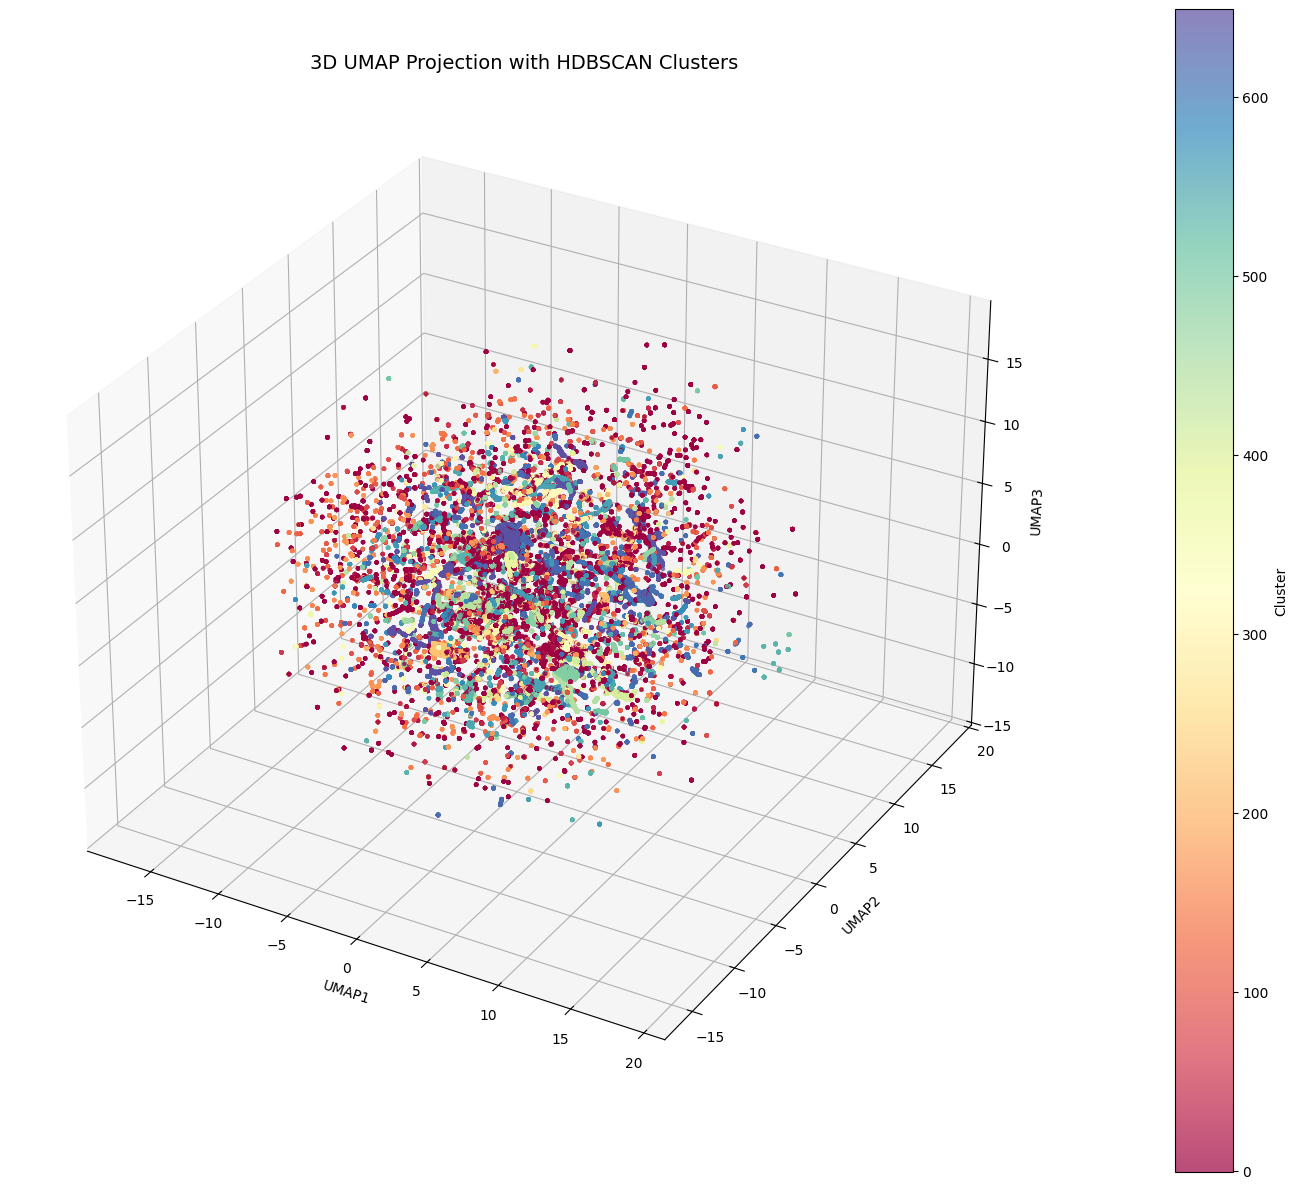

In [ ]:
# Create a 3D UMAP embedding
from mpl_toolkits.mplot3d import Axes3D

# Generate 3D UMAP embedding
reducer_3d = UMAP(n_neighbors=15, min_dist=0.01, n_components=3, random_state=42)
X_train_umap_3d = reducer_3d.fit_transform(X_train_pca)

# Create 3D plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot points with cluster coloring
scatter = ax.scatter(
    X_train_umap_3d[:, 0],
    X_train_umap_3d[:, 1],
    X_train_umap_3d[:, 2],
    c=cluster_labels,
    cmap='Spectral',
    s=5,
    alpha=0.7
)

# Add labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('3D UMAP Projection with HDBSCAN Clusters', fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Cluster')

# Enable interactive rotation
plt.tight_layout()
plt.show()


In [32]:

# Optionally: Create a simple animation to show 3D structure better
from matplotlib import animation

def rotate(angle):
    ax.view_init(azim=angle)
    return fig,
# Create animation (uncomment to run)
ani = animation.FuncAnimation(fig, rotate, frames=range(0, 360, 5), interval=100)
ani.save('3d_umap_rotation.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.


# Optimize HDBSCAN parameters

In [ ]:
# Create optimized UMAP embedding
optimized_reducer = UMAP(n_neighbors=15,
                         min_dist=0.01,
                         n_components=2,
                         random_state=42)

# Create embedding for clustering (use higher dimensions to capture more structure)
umap_for_clustering = UMAP(n_neighbors=15,
                          min_dist=0.01,
                          n_components=5,  # Using more dimensions for clustering
                          random_state=42)

# Generate embeddings
X_train_umap_viz = optimized_reducer.fit_transform(X_train_pca)  # For visualization
X_train_umap_cluster = umap_for_clustering.fit_transform(X_train_pca)  # For clustering

# Re-run HDBSCAN with refined parameters
refined_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=40,  # Slightly reduced to detect more granular clusters
    min_samples=5,
    cluster_selection_epsilon=0.3,  # Slightly reduced for tighter clusters
    metric='euclidean'
)


/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/spe

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Number of clusters found: 958
Cluster distribution:
Cluster 0: 61 samples
Cluster 1: 75 samples
Cluster 2: 73 samples
Cluster 3: 82 samples
Cluster 4: 55 samples
Cluster 5: 43 samples
Cluster 6: 83 samples
Cluster 7: 629 samples
Cluster 8: 118 samples
Cluster 9: 45 samples
Cluster 10: 111 samples
Cluster 11: 189 samples
Cluster 12: 69 samples
Cluster 13: 54 samples
Cluster 14: 72 samples
Cluster 15: 83 samples
Cluster 16: 1089 samples
Cluster 17: 55 samples
Cluster 18: 211 samples
Cluster 19: 42 samples
Cluster 20: 45 samples
Cluster 21: 116 samples
Cluster 22: 48 samples
Cluster 23: 44 samples
Cluster 24: 82 samples
Cluster 25: 46 samples
Cluster 26: 46 samples
Cluster 27: 584 samples
Cluster 28: 315 samples
Cluster 29: 820 samples
Cluster 30: 65 samples
Cluster 31: 99 samples
Cluster 32: 40 samples
Cluster 33: 68 samples
Cluster 34: 116 samples
Cluster 35: 141 samples
Cluster 36: 41 samples
Cluster 37: 124 samples
Cluster 38: 120 samples
Cluster 39: 98 samples
Cluster 40: 171 samples

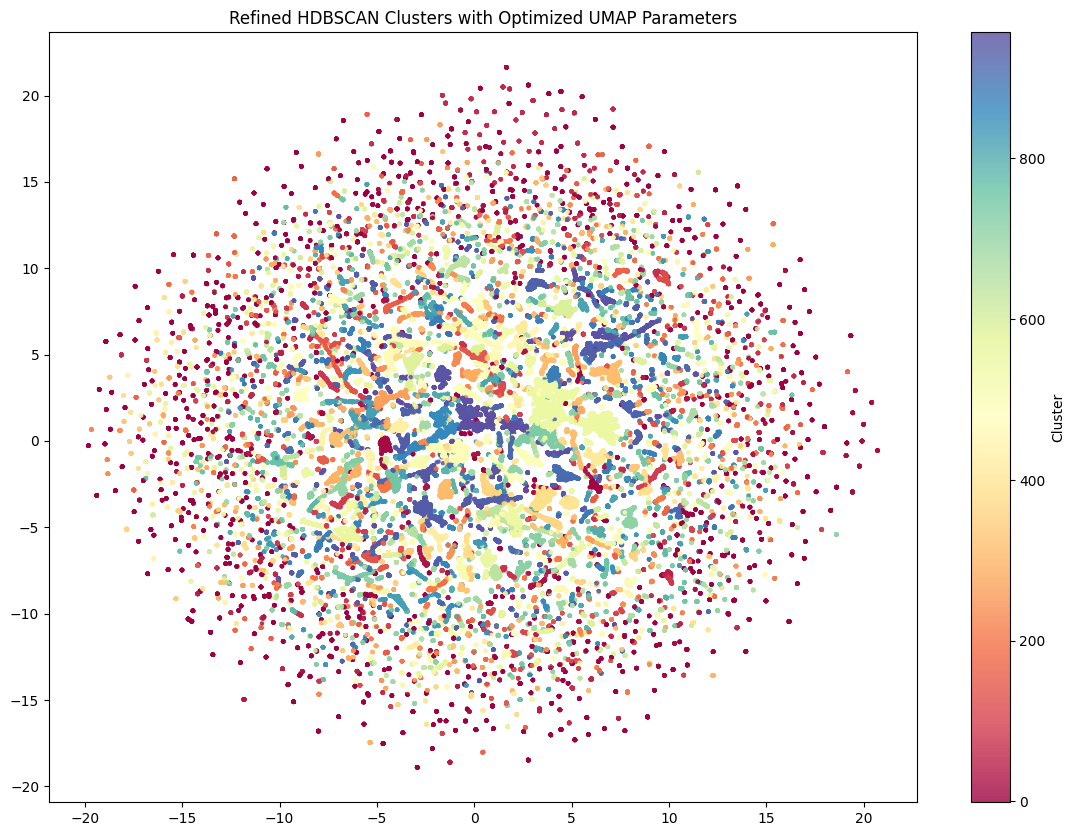

In [34]:
# Fit on the higher-dimensional UMAP embedding
refined_cluster_labels = refined_clusterer.fit_predict(X_train_umap_cluster)

# Check the new clustering results
unique_refined_clusters = np.unique(refined_cluster_labels)
print(f"Number of clusters found: {len(unique_refined_clusters) - (1 if -1 in unique_refined_clusters else 0)}")
print("Cluster distribution:")
for cluster in unique_refined_clusters:
    if cluster != -1:
        print(f"Cluster {cluster}: {np.sum(refined_cluster_labels == cluster)} samples")
print(f"Noise points: {np.sum(refined_cluster_labels == -1)} samples")

# Visualize with optimized parameters
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_train_umap_viz[:, 0], X_train_umap_viz[:, 1],
                     c=refined_cluster_labels, cmap='Spectral', s=5, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('Refined HDBSCAN Clusters with Optimized UMAP Parameters')
plt.show()

- Highly specialized market structure: market with many distinct micro-segments with specific characteristics.

- Few dominant patterns: The larger clusters likely represent common procurement types that follow standardized patterns.

- Continuous spectrum: The large number of small clusters suggests procurement types exist on a continuum rather than in sharply defined categories.



# Exploration of clusters

In [ ]:
# Add refined cluster labels back to original data
X_train_with_refined_clusters = X_train.copy()
X_train_with_refined_clusters['cluster'] = refined_cluster_labels


In [36]:
# 1. Analyze the largest clusters
# ==============================
# Get the 10 largest clusters by size
largest_clusters = pd.Series(refined_cluster_labels).value_counts()
largest_clusters = largest_clusters[largest_clusters.index != -1]  # Remove noise points
top_10_clusters = largest_clusters.nlargest(10).index

print("Top 10 largest clusters:")
for cluster in top_10_clusters:
    cluster_size = np.sum(refined_cluster_labels == cluster)
    print(f"Cluster {cluster}: {cluster_size} samples ({cluster_size/len(X_train)*100:.2f}% of data)")

Top 10 largest clusters:
Cluster 547: 4589 samples (2.02% of data)
Cluster 548: 3981 samples (1.75% of data)
Cluster 931: 2621 samples (1.15% of data)
Cluster 731: 2604 samples (1.15% of data)
Cluster 540: 2410 samples (1.06% of data)
Cluster 930: 2166 samples (0.95% of data)
Cluster 493: 2129 samples (0.94% of data)
Cluster 494: 2088 samples (0.92% of data)
Cluster 948: 2004 samples (0.88% of data)
Cluster 954: 1966 samples (0.87% of data)


In [ ]:
# 2. Analyze these top 10 clusters by their dominant features
# ===================================================
print("\n\nKey characteristics of largest clusters:")
for cluster in top_10_clusters:
    cluster_data = X_train_with_refined_clusters[X_train_with_refined_clusters['cluster'] == cluster]

    # Get top CPV codes
    top_cpvs = cluster_data['codeCPV_2'].value_counts().head(3)
    top_cpv_pcts = (top_cpvs / len(cluster_data) * 100).round(1)

    # Get numerical stats
    avg_amount = cluster_data['montant'].mean() if 'montant' in cluster_data.columns else 0
    med_amount = cluster_data['montant'].median() if 'montant' in cluster_data.columns else 0

    print(f"\nCluster {cluster} ({len(cluster_data)} samples):")
    print(f"  Top CPV codes: ")
    for i, (cpv, count) in enumerate(top_cpvs.items()):
        print(f"    - {cpv}: {count} contracts ({top_cpv_pcts.iloc[i]}%)")
    print(f"  Average amount: {avg_amount:,.2f}")
    print(f"  Median amount: {med_amount:,.2f}")



Key characteristics of largest clusters:

Cluster 547 (4589 samples):
  Top CPV codes: 
    - 45000000: 1402 contracts (30.6%)
    - 71000000: 998 contracts (21.7%)
    - 66000000: 457 contracts (10.0%)
  Average amount: 657,630.07
  Median amount: 200,000.00

Cluster 548 (3981 samples):
  Top CPV codes: 
    - 45000000: 3545 contracts (89.0%)
    - 44000000: 134 contracts (3.4%)
    - 39000000: 55 contracts (1.4%)
  Average amount: 916,025.66
  Median amount: 277,663.61

Cluster 931 (2621 samples):
  Top CPV codes: 
    - 45000000: 2120 contracts (80.9%)
    - 44000000: 79 contracts (3.0%)
    - 79000000: 72 contracts (2.7%)
  Average amount: 1,536,482.03
  Median amount: 350,000.00

Cluster 731 (2604 samples):
  Top CPV codes: 
    - 66000000: 483 contracts (18.5%)
    - 71000000: 304 contracts (11.7%)
    - 34000000: 275 contracts (10.6%)
  Average amount: 654,061.18
  Median amount: 192,804.50

Cluster 540 (2410 samples):
  Top CPV codes: 
    - 45000000: 1201 contracts (49.8%)
 

- Construction Clusters
Cluster 548 (median 278K€, 19 months): Standard construction projects
Cluster 494 (median 203K€, 12 months): Small, quick construction projects
Cluster 931 (median 350K€, 24 months): Larger building/infrastructure with longer timeframes
- Mixed Service-Construction Clusters
Cluster 547 (median 200K€, 28 months): Integrated design-build projects with extended timelines
Cluster 540 (median 92K€, 12 months): Small consulting/construction projects with quick delivery
Cluster 930 (median 379K€, 48 months): Major technical projects requiring multi-year commitments
- Professional/Financial Services
Cluster 731 (median 193K€, 46 months): Long-term service frameworks (likely multi-year contracts)
Cluster 493 (median 100K€, 24 months): Medium-term professional services
- Complex Projects
Cluster 948 (median 198K€, 12 months): Quick complex projects
Cluster 954 (median 300K€, 24 months): Medium-term complex projects






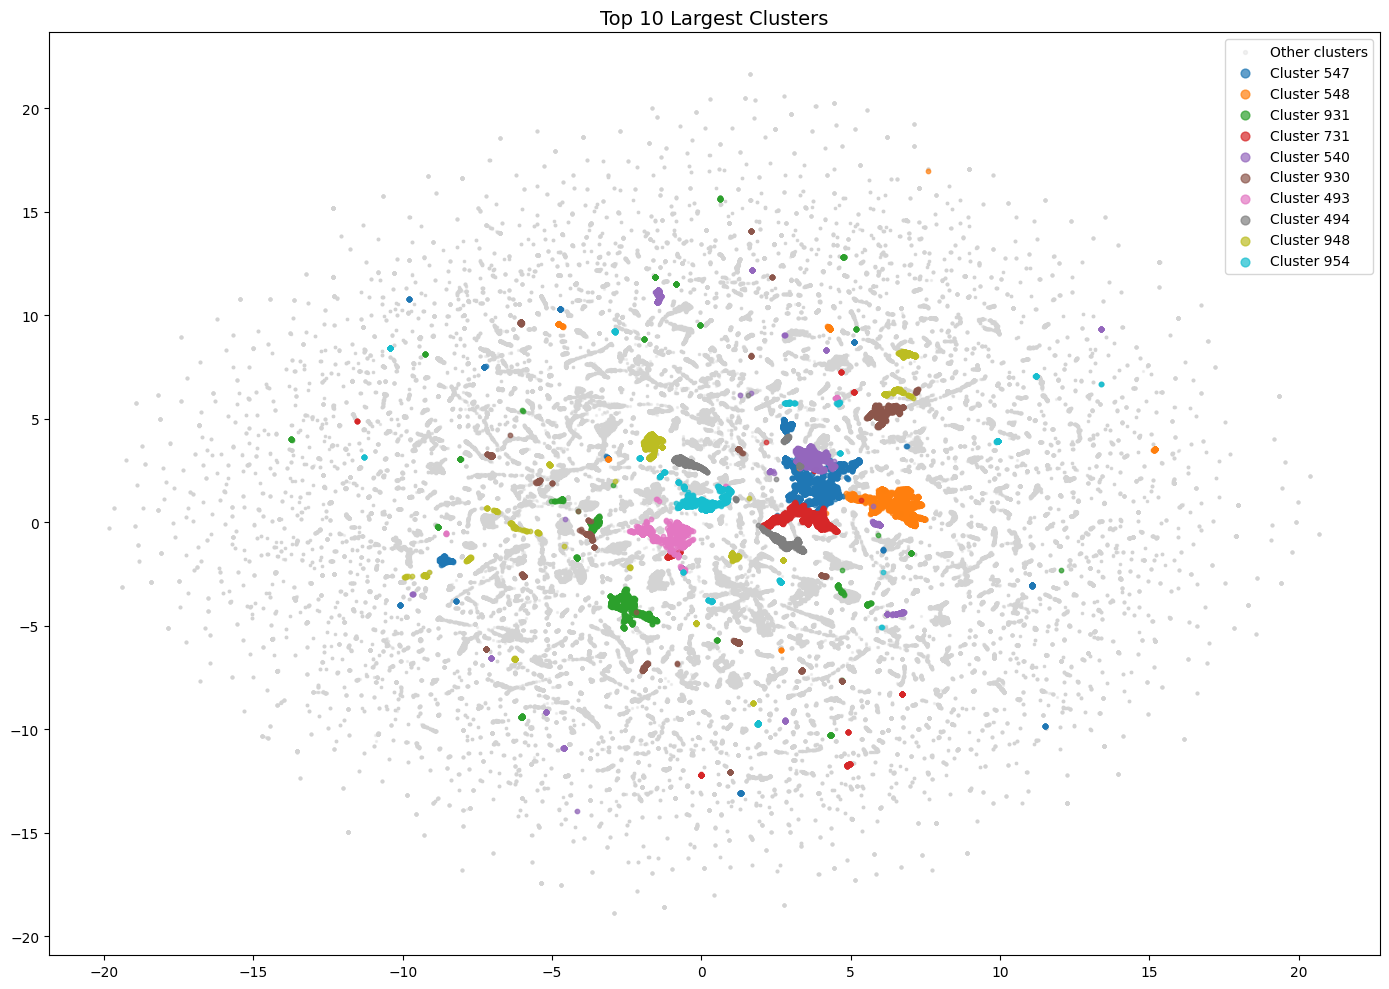

In [ ]:
# 3. Visualize these top clusters
# ==============================
plt.figure(figsize=(14, 10))
# Create a mask for top clusters
is_top_cluster = np.isin(refined_cluster_labels, top_10_clusters)
# Plot top clusters with specific colors and other clusters in gray
plt.scatter(X_train_umap_viz[~is_top_cluster, 0], X_train_umap_viz[~is_top_cluster, 1],
           color='lightgray', s=2, alpha=0.3, label='Other clusters')

# Use a custom colormap for top clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_clusters)))
for i, cluster in enumerate(top_10_clusters):
    cluster_mask = refined_cluster_labels == cluster
    plt.scatter(X_train_umap_viz[cluster_mask, 0], X_train_umap_viz[cluster_mask, 1],
               color=colors[i], s=10, alpha=0.7, label=f"Cluster {cluster}")

plt.title('Top 10 Largest Clusters', fontsize=14)
plt.legend(markerscale=2)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Calculate cluster quality metrics for the refined clusters
# ================================================================
refined_valid_points = refined_cluster_labels != -1
if np.sum(refined_valid_points) > 1 and len(np.unique(refined_cluster_labels[refined_valid_points])) > 1:
    try:
        # Use a sample for large datasets to make computation feasible
        sample_size = min(10000, sum(refined_valid_points))
        sample_indices = np.random.choice(np.where(refined_valid_points)[0], size=sample_size, replace=False)

        refined_silhouette_avg = silhouette_score(
            X_train_umap_cluster[sample_indices],
            refined_cluster_labels[sample_indices]
        )
        print(f"Silhouette Score for refined clusters (sampled): {refined_silhouette_avg:.3f}")
    except:
        print("Silhouette score computation failed, likely due to memory constraints.")

Silhouette Score for refined clusters (sampled): 0.639


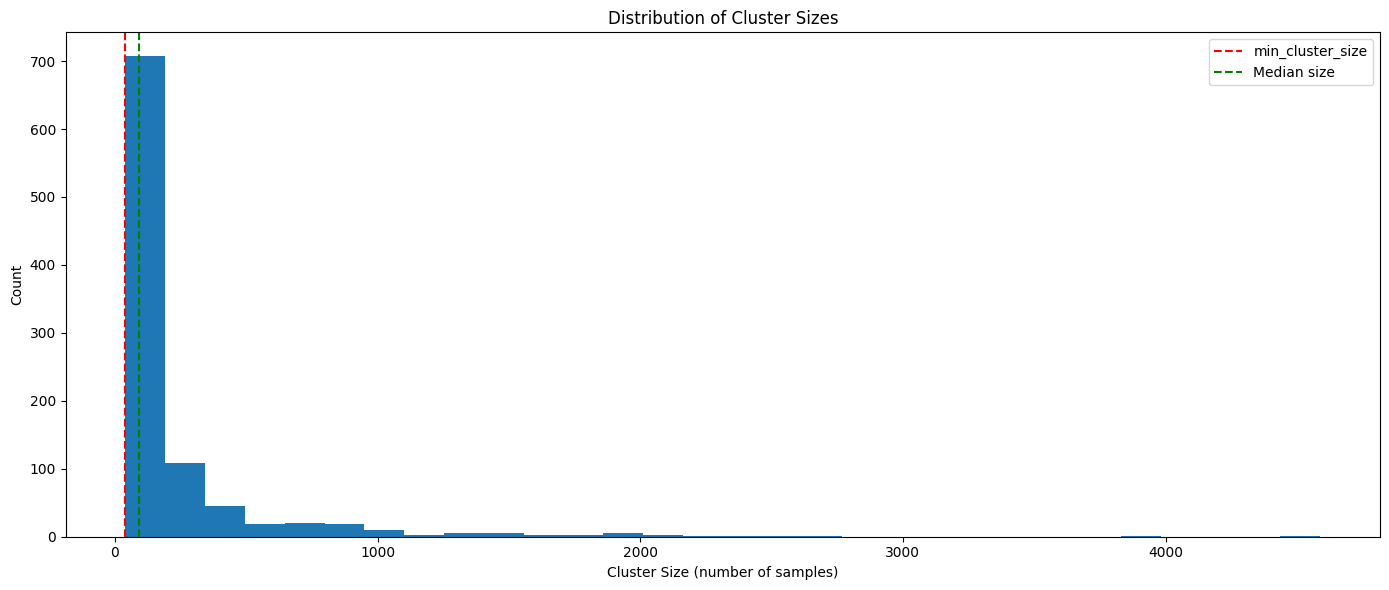

In [40]:
# 5. Create a histogram of cluster sizes to understand the distribution
# ====================================================================
plt.figure(figsize=(14, 6))
cluster_sizes = pd.Series(refined_cluster_labels).value_counts()
cluster_sizes = cluster_sizes[cluster_sizes.index != -1]  # Remove noise
plt.hist(cluster_sizes.values, bins=30)
plt.xlabel('Cluster Size (number of samples)')
plt.ylabel('Count')
plt.title('Distribution of Cluster Sizes')
plt.axvline(x=40, color='r', linestyle='--', label='min_cluster_size')
plt.axvline(x=cluster_sizes.median(), color='g', linestyle='--', label='Median size')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 7. Examine the feature importance for each cluster
# =================================================
# This approach uses a simple classifier to identify what features
# best distinguish each cluster from the rest
if X_train_preproc is not None:
    from sklearn.ensemble import RandomForestClassifier

    print("\nTop distinguishing features for each cluster:")
    for cluster in top_10_clusters:
        # Create binary target: 1 for this cluster, 0 for others
        y_binary = (refined_cluster_labels == cluster).astype(int)

        # Train a simple model to distinguish this cluster
        rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
        try:
            # Sample for large datasets
            sample_size = min(50000, X_train_pca.shape[0])
            indices = np.random.choice(X_train_pca.shape[0], size=sample_size, replace=False)
            rf.fit(X_train_pca[indices], y_binary[indices])

            # Get feature importance
            importances = rf.feature_importances_
            top_indices = importances.argsort()[-5:][::-1]  # Top 5 features

            print(f"\nCluster {cluster} - Top distinguishing PCA components:")
            for idx in top_indices:
                print(f"  - PCA component {idx}: {importances[idx]:.4f}")

        except Exception as e:
            print(f"Could not analyze feature importance for cluster {cluster}: {str(e)}")


Top distinguishing features for each cluster:

Cluster 547 - Top distinguishing PCA components:
  - PCA component 7: 0.5934
  - PCA component 8: 0.0755
  - PCA component 14: 0.0499
  - PCA component 5: 0.0412
  - PCA component 6: 0.0408

Cluster 548 - Top distinguishing PCA components:
  - PCA component 7: 0.3474
  - PCA component 6: 0.1399
  - PCA component 5: 0.1016
  - PCA component 8: 0.0938
  - PCA component 15: 0.0513

Cluster 931 - Top distinguishing PCA components:
  - PCA component 6: 0.3626
  - PCA component 8: 0.1304
  - PCA component 12: 0.1128
  - PCA component 10: 0.0721
  - PCA component 5: 0.0531

Cluster 731 - Top distinguishing PCA components:
  - PCA component 7: 0.3207
  - PCA component 10: 0.1603
  - PCA component 9: 0.1270
  - PCA component 8: 0.1186
  - PCA component 6: 0.0658

Cluster 540 - Top distinguishing PCA components:
  - PCA component 14: 0.2834
  - PCA component 7: 0.2220
  - PCA component 10: 0.1203
  - PCA component 15: 0.0760
  - PCA component 11: 0

In [ ]:
# Let's implement code to investigate the duration issue
# ==========================================================

# 1. First, check the original duration values in X_train
print("Original duration data in X_train:")
print(f"Min duration: {X_train['dureeMois'].min()}")
print(f"Max duration: {X_train['dureeMois'].max()}")
print(f"Mean duration: {X_train['dureeMois'].mean()}")
print(f"Missing values: {X_train['dureeMois'].isna().sum()} ({X_train['dureeMois'].isna().mean()*100:.2f}%)")

# 2. Check what happens after preprocessing
print("\nAfter preprocessing pipeline:")
print(f"Min duration: {X_train_preproc['other_num_pipeline__dureeMois'].min()}")
print(f"Max duration: {X_train_preproc['other_num_pipeline__dureeMois'].max()}")
print(f"Mean duration: {X_train_preproc['other_num_pipeline__dureeMois'].mean()}")

# 3. Check how the durations are distributed in the top clusters
print("\nDuration statistics per cluster:")
for cluster in top_10_clusters:
    cluster_data = X_train_with_refined_clusters[X_train_with_refined_clusters['cluster'] == cluster]
    valid_durations = cluster_data['dureeMois'][cluster_data['dureeMois'] > 0]

    print(f"\nCluster {cluster}:")
    print(f"  Contracts with duration = 0: {(cluster_data['dureeMois'] == 0).sum()} ({(cluster_data['dureeMois'] == 0).mean()*100:.1f}%)")
    print(f"  Contracts with missing duration: {cluster_data['dureeMois'].isna().sum()} ({cluster_data['dureeMois'].isna().mean()*100:.1f}%)")

    if len(valid_durations) > 0:
        print(f"  Valid durations - Mean: {valid_durations.mean():.1f}, Median: {valid_durations.median():.1f}")
    else:
        print("  No valid duration values found")

# 4. Check if duration information was preserved in the PCA
# Let's see if it's in the PCA components by calculating correlation
from sklearn.preprocessing import StandardScaler

# Get original durations (with zeros treated as missing)
original_durations = X_train['dureeMois'].copy()
original_durations[original_durations == 0] = np.nan

# Standardize for fair comparison
scaler = StandardScaler()
std_durations = scaler.fit_transform(original_durations.values.reshape(-1, 1))

# Calculate correlation with each PCA component
correlations = []
for i in range(X_train_pca.shape[1]):
    # Skip NaN values in correlation
    mask = ~np.isnan(std_durations.flatten())
    if np.sum(mask) > 0:
        corr = np.corrcoef(X_train_pca[mask, i], std_durations.flatten()[mask])[0, 1]
        correlations.append((i, abs(corr)))

# Sort by correlation strength
correlations.sort(key=lambda x: x[1], reverse=True)
print("\nPCA components most correlated with duration:")
for i, corr in correlations[:5]:
    print(f"  - PCA component {i}: |correlation| = {corr:.4f}")

Original duration data in X_train:
Min duration: 1.0
Max duration: 864.0
Mean duration: 28.348653050444582
Missing values: 0 (0.00%)

After preprocessing pipeline:
Min duration: -2.5058704957833187
Max duration: 3.9921608612786934
Mean duration: 1.6083543609630915e-15

Duration statistics per cluster:

Cluster 547:
  Contracts with duration = 0: 0 (0.0%)
  Contracts with missing duration: 0 (0.0%)
  Valid durations - Mean: 31.9, Median: 28.0

Cluster 548:
  Contracts with duration = 0: 0 (0.0%)
  Contracts with missing duration: 0 (0.0%)
  Valid durations - Mean: 21.4, Median: 19.0

Cluster 931:
  Contracts with duration = 0: 0 (0.0%)
  Contracts with missing duration: 0 (0.0%)
  Valid durations - Mean: 28.7, Median: 24.0

Cluster 731:
  Contracts with duration = 0: 0 (0.0%)
  Contracts with missing duration: 0 (0.0%)
  Valid durations - Mean: 37.7, Median: 46.0

Cluster 540:
  Contracts with duration = 0: 0 (0.0%)
  Contracts with missing duration: 0 (0.0%)
  Valid durations - Mean: 1

# Optimize HDBSCAN parameters

In [ ]:
# Try different parameter combinations
parameter_grid = [
    {'min_cluster_size': 30, 'min_samples': 5, 'cluster_selection_epsilon': 0.3},
    {'min_cluster_size': 40, 'min_samples': 10, 'cluster_selection_epsilon': 0.4},
    {'min_cluster_size': 50, 'min_samples': 3, 'cluster_selection_epsilon': 0.5},
]

results = []
for params in parameter_grid:
    # Create clusterer with current parameters
    clusterer = hdbscan.HDBSCAN(**params, metric='euclidean')

    # Fit and predict
    labels = clusterer.fit_predict(X_train_pca)

    # Calculate metrics
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.sum(labels == -1) / len(labels)

    # Calculate silhouette score if we have multiple clusters
    silhouette_avg = 0
    if n_clusters > 1:
        valid_points = labels != -1
        if np.sum(valid_points) > 1:
            silhouette_avg = silhouette_score(
                X_train_pca[valid_points],
                labels[valid_points]
            )

    # Store results
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_ratio': noise_ratio,
        'silhouette_score': silhouette_avg
    })

# Display results as DataFrame
results_df = pd.DataFrame(results)
results_df

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.1

params  n_clusters  noise_ratio  \
0  {'min_cluster_size': 30, 'min_samples': 5, 'cl...        1159     0.233590   
1  {'min_cluster_size': 40, 'min_samples': 10, 'c...         711     0.258152   
2  {'min_cluster_size': 50, 'min_samples': 3, 'cl...         694     0.162268   

   silhouette_score  
0          0.081858  
1          0.072116  
2          0.060920

In [ ]:
# Extended parameter grid for more focused clusters
extended_parameter_grid = [
    {'min_cluster_size': 100, 'min_samples': 10, 'cluster_selection_epsilon': 0.5},
    {'min_cluster_size': 150, 'min_samples': 15, 'cluster_selection_epsilon': 0.6},
    {'min_cluster_size': 200, 'min_samples': 20, 'cluster_selection_epsilon': 0.7},
    {'min_cluster_size': 250, 'min_samples': 25, 'cluster_selection_epsilon': 0.8},
]

# Run the same evaluation code with this extended grid
results = []
for params in extended_parameter_grid:
    # Create clusterer with current parameters
    clusterer = hdbscan.HDBSCAN(**params, metric='euclidean')

    # Fit and predict
    labels = clusterer.fit_predict(X_train_pca)

    # Calculate metrics
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.sum(labels == -1) / len(labels)

    # Calculate silhouette score if we have multiple clusters
    silhouette_avg = 0
    if n_clusters > 1:
        valid_points = labels != -1
        if np.sum(valid_points) > 1:
            silhouette_avg = silhouette_score(
                X_train_pca[valid_points],
                labels[valid_points]
            )

    # Store results
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_ratio': noise_ratio,
        'silhouette_score': silhouette_avg
    })

# Display results as DataFrame
extended_results_df = pd.DataFrame(results)
extended_results_df

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.1

params  n_clusters  noise_ratio  \
0  {'min_cluster_size': 100, 'min_samples': 10, '...         366     0.224857   
1  {'min_cluster_size': 150, 'min_samples': 15, '...         213     0.224364   
2  {'min_cluster_size': 200, 'min_samples': 20, '...         177     0.268342   
3  {'min_cluster_size': 250, 'min_samples': 25, '...          62     0.231209   

   silhouette_score  
0          0.064685  
1          0.061595  
2          0.083842  
3          0.021677

- Best silhouette score: Configuration #2 (200/20/0.7) offers the highest silhouette score (0.084) despite having more noise points
min_cluster_size = 200
min_samples = 20
min_cluster_hierarchy = 0.7
- Reasonable cluster count: Configuration #2 gives 177 clusters, which is much more manageable than 694+ from the previous runs
- Trade-off point: Configuration #3 dramatically reduces clusters to 62, but with a significant drop in cluster quality (silhouette score of 0.022)

# Gaussian Mixture Model (GMM) clustering

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [58]:
# Try different numbers of components
n_components_range = [10, 15, 20, 25, 30]
gmm_results = []

for n_components in n_components_range:
    # Create and fit GMM model
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=42,
        max_iter=100
    )

    # Fit and predict clusters
    gmm.fit(X_train_pca)
    gmm_labels = gmm.predict(X_train_pca)

    # Calculate quality metrics
    sil_score = silhouette_score(X_train_pca, gmm_labels)
    cal_score = calinski_harabasz_score(X_train_pca, gmm_labels)

    # Calculate BIC (Bayesian Information Criterion)
    bic = gmm.bic(X_train_pca)

    gmm_results.append({
        'n_components': n_components,
        'silhouette_score': sil_score,
        'calinski_score': cal_score,
        'bic': bic
    })

In [59]:
# Display results
gmm_results_df = pd.DataFrame(gmm_results)
print(gmm_results_df)

# Select best model based on highest silhouette score
best_n = gmm_results_df.loc[gmm_results_df['silhouette_score'].idxmax(), 'n_components']


   n_components  silhouette_score  calinski_score           bic
0            10          0.034273     7742.767542 -3.959680e+06
1            15          0.040359     6638.135085 -5.322847e+06
2            20          0.040902     5463.890538 -7.293706e+06
3            25          0.031509     4401.137840 -7.145538e+06
4            30          0.037368     4262.552131 -8.395682e+06


Don't expect perfect clusters - the low silhouette scores indicate overlapping clusters, which is normal for this type of data.

Optimal Components: The model with 20 components (n=20) has the highest silhouette score (0.041), indicating this is the best clustering structure.

Silhouette Scores: All silhouette scores are quite low (0.03-0.04), suggesting clusters are not very well-separated. This is common with procurement data where market categories have fuzzy boundaries.

Calinski-Harabasz Score: These scores decrease as the number of components increases, which is expected. Higher scores with fewer clusters (7742 at n=10) indicate better between-cluster separation relative to within-cluster variance.

BIC Values: The Bayesian Information Criterion continues to decrease with more components, with a slight anomaly between n=20 and n=25. The largest negative value at n=30 suggests that from a pure statistical fit perspective, more complex models keep improving.




In [61]:
# Fit best model
best_gmm = GaussianMixture(
    n_components=20,
    covariance_type='full',
    random_state=42
)
best_gmm.fit(X_train_pca)
gmm_labels = best_gmm.predict(X_train_pca)


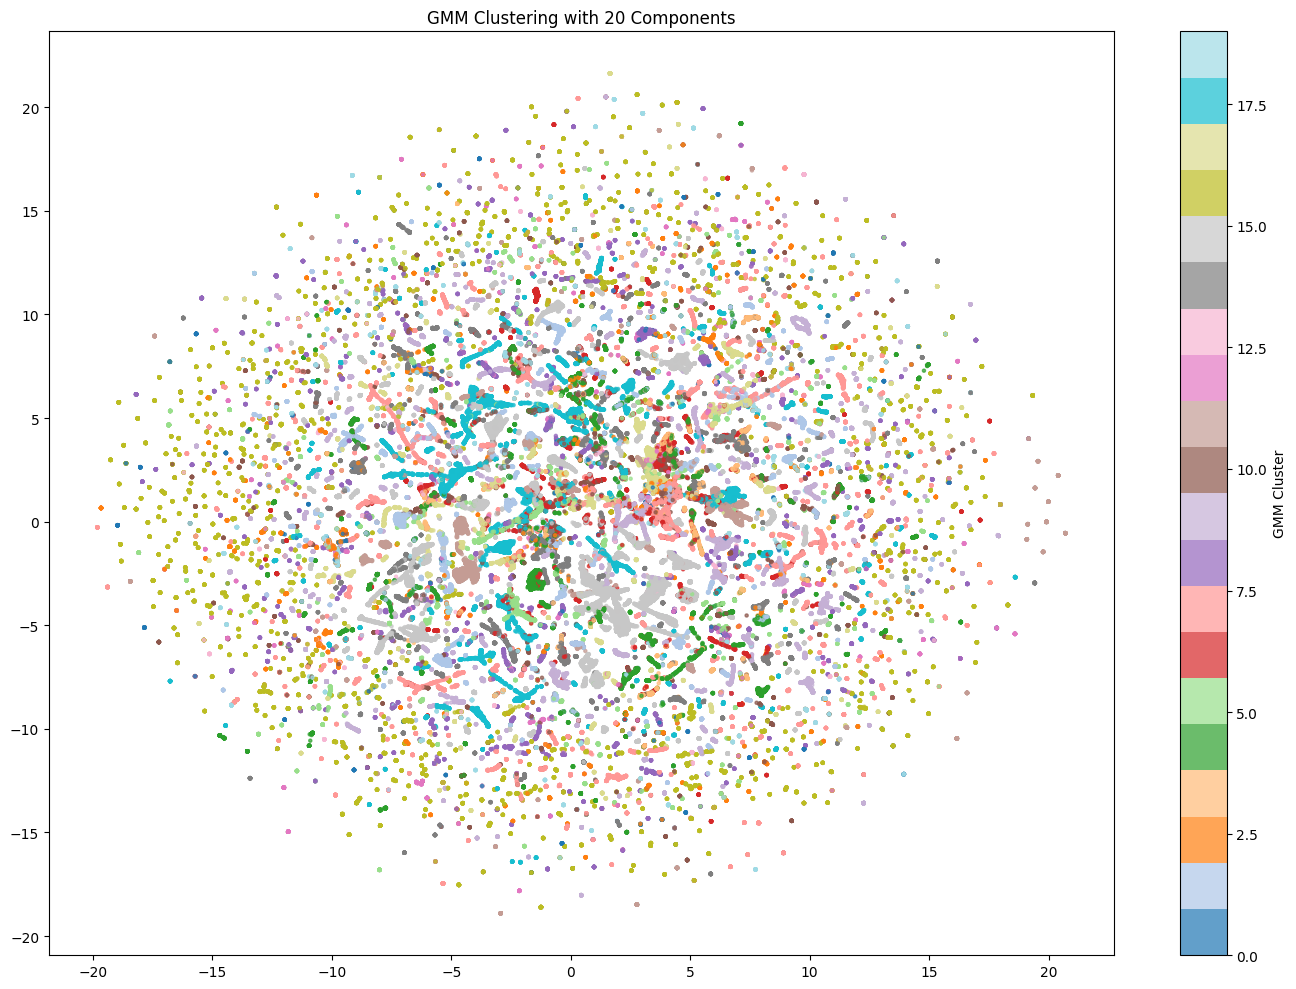

In [62]:

# Visualize GMM clustering
plt.figure(figsize=(14, 10))
plt.scatter(
    X_train_umap_viz[:, 0],
    X_train_umap_viz[:, 1],
    c=gmm_labels,
    cmap='tab20',
    s=5,
    alpha=0.7
)
plt.colorbar(label='GMM Cluster')
plt.title(f'GMM Clustering with {int(best_n)} Components')
plt.tight_layout()
plt.show()

In [63]:
# For the selected clustering solution (Stage 2 or GMM)
final_clustering = gmm_labels

# Add labels to original data
X_train_final = X_train.copy()
X_train_final['cluster'] = final_clustering

# Analyze top clusters more deeply
top_clusters = pd.Series(final_clustering).value_counts().head(10).index

# Create profile for each cluster with more features
profiles = []

for cluster_id in np.sort(np.unique(final_clustering)):
    cluster_data = X_train_final[X_train_final['cluster'] == cluster_id]

    # Skip very small clusters
    if len(cluster_data) < 20:
        continue

    # Calculate key metrics
    profile = {
        'cluster_id': cluster_id,
        'size': len(cluster_data),
        'pct_total': len(cluster_data) / len(X_train_final) * 100,

        # CPV characteristics
        'top_cpv': cluster_data['codeCPV_2'].value_counts().index[0],
        'top_cpv_pct': cluster_data['codeCPV_2'].value_counts().iloc[0] / len(cluster_data) * 100,
        'cpv_diversity': len(cluster_data['codeCPV_2'].unique()),

        # Financial characteristics
        'mean_amount': cluster_data['montant'].mean(),
        'median_amount': cluster_data['montant'].median(),
        'amount_std': cluster_data['montant'].std(),

        # Duration characteristics
        'mean_duration': cluster_data['dureeMois'].mean(),
        'median_duration': cluster_data['dureeMois'].median(),
    }

    # Add derived metrics
    profile['euro_per_month'] = profile['median_amount'] / profile['median_duration'] if profile['median_duration'] > 0 else profile['median_amount']

    profiles.append(profile)

# Convert to DataFrame for easier analysis
profiles_df = pd.DataFrame(profiles).sort_values('size', ascending=False)
profiles_df

cluster_id   size  pct_total   top_cpv  top_cpv_pct  cpv_diversity  \
15          15  28925  12.732195  45000000    96.691443              2   
18          18  22129   9.740734  45000000    92.774188             17   
7            7  21078   9.278105  71000000    11.020970             39   
9            9  16793   7.391936  15000000    11.903769             39   
16          16  16365   7.203539  71000000    93.644974              2   
14          14  16013   7.048596  71000000    21.626179             39   
1            1  14488   6.377322  45000000    69.478189             25   
4            4  14181   6.242187  79000000    11.585925             39   
8            8  10997   4.840655  45000000   100.000000              1   
17          17  10328   4.546175  71000000    17.670411             40   
11          11  10295   4.531649  45000000   100.000000              1   
5            5   8300   3.653491  45000000   100.000000              1   
6            6   7420   3.266133  45000000    30.000000             38   
10          10   7156   3.149925  45000000    30.533818             40   
3            3   5852   2.575931  72000000    16.558442             36   
2            2   5663   2.492737  71000000    43.704750             35   
19          19   5396   2.375209  90000000    15.103781             36   
12          12   2624   1.155031  45000000    35.670732             36   
0            0   1724   0.758870  71000000    46.635731             30   
13          13   1453   0.639581  45000000    20.233999             35   

     mean_amount  median_amount    amount_std  mean_duration  median_duration  \
15  2.775724e+05      117990.00  8.287720e+05      13.432118             12.0   
18  6.331489e+05      146789.18  2.149264e+06      17.081341             12.0   
7   1.031907e+06      240839.00  3.346609e+06      41.057453             48.0   
9   9.506177e+05      251662.00  2.834648e+06      42.654439             48.0   
16  4.713501e+05      143050.00  1.482926e+06      33.372563             31.0   
14  4.615752e+05       90000.00  2.182838e+06      32.344408             36.0   
1   3.935936e+05      117884.44  1.731925e+06      18.594078             12.0   
4   3.412871e+05       92721.00  1.748482e+06      31.992314             36.0   
8   2.001572e+06      613278.07  4.377426e+06      18.624079             12.0   
17  1.689581e+06      242948.04  5.629142e+06      38.495546             48.0   
11  9.462878e+05      239500.00  2.928711e+06      20.195726             16.0   
5   2.704514e+06      600000.00  5.826840e+06      30.178916             36.0   
6   1.084998e+06      198565.80  3.651174e+06      28.356199             24.0   
10  9.607270e+05      163036.97  3.083381e+06      29.448295             24.0   
3   3.548923e+05      100000.00  1.539920e+06      34.040841             38.0   
2   5.994424e+05      139355.00  2.266752e+06      33.019954             35.0   
19  2.045816e+06      427791.70  5.024653e+06      41.360267             48.0   
12  4.203803e+06      800000.00  7.268024e+06      41.729040             43.0   
0   1.657618e+06      324610.00  4.188627e+06      31.787123             32.0   
13  7.581837e+05      139000.00  3.037734e+06      33.912595             32.0   

    euro_per_month  
15     9832.500000  
18    12232.431667  
7      5017.479167  
9      5242.958333  
16     4614.516129  
14     2500.000000  
1      9823.703333  
4      2575.583333  
8     51106.505833  
17     5061.417500  
11    14968.750000  
5     16666.666667  
6      8273.575000  
10     6793.207083  
3      2631.578947  
2      3981.571429  
19     8912.327083  
12    18604.651163  
0     10144.062500  
13     4343.750000